# Pymaceuticals Inc.
---

### Analysis

- 



 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(mouse_metadata,study_results,how="outer",on="Mouse ID")
# rearrage columns 
combined_df = combined_df[["Mouse ID","Timepoint","Drug Regimen","Sex","Age_months","Weight (g)","Tumor Volume (mm3)","Metastatic Sites"]]
# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,k403,0,Ramicane,Male,21,16,45.000000,0
1,k403,5,Ramicane,Male,21,16,38.825898,0
2,k403,10,Ramicane,Male,21,16,35.014271,1
3,k403,15,Ramicane,Male,21,16,34.223992,1
4,k403,20,Ramicane,Male,21,16,32.997729,1


In [2]:
# Checking the number of mice.
number_of_mice = len(combined_df["Mouse ID"].unique())
number_of_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_df_duplicated = combined_df[combined_df.duplicated(subset = ["Mouse ID", "Timepoint"],keep = False)]
combined_df_duplicated["Mouse ID"].unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_df_duplicated = combined_df[combined_df.duplicated(subset = ["Mouse ID", "Timepoint"],keep = False)]
combined_df_duplicated

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
908,g989,0,Propriva,Female,21,26,45.000000,0
909,g989,0,Propriva,Female,21,26,45.000000,0
910,g989,5,Propriva,Female,21,26,48.786801,0
911,g989,5,Propriva,Female,21,26,47.570392,0
912,g989,10,Propriva,Female,21,26,51.745156,0
913,g989,10,Propriva,Female,21,26,49.880528,0
914,g989,15,Propriva,Female,21,26,51.325852,1
915,g989,15,Propriva,Female,21,26,53.442020,0
916,g989,20,Propriva,Female,21,26,55.326122,1
917,g989,20,Propriva,Female,21,26,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_df_non_duplicated = combined_df[combined_df["Mouse ID"] != "g989"]
combined_df_non_duplicated.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,k403,0,Ramicane,Male,21,16,45.000000,0
1,k403,5,Ramicane,Male,21,16,38.825898,0
2,k403,10,Ramicane,Male,21,16,35.014271,1
3,k403,15,Ramicane,Male,21,16,34.223992,1
4,k403,20,Ramicane,Male,21,16,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
number_of_mice_nondup = len(combined_df_non_duplicated["Mouse ID"].unique())
number_of_mice_nondup

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
Mean_tv = combined_df_non_duplicated.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
Median_tv = combined_df_non_duplicated.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
Variance_tv = combined_df_non_duplicated.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
StdDev_tv = combined_df_non_duplicated.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
StdErr_tv = combined_df_non_duplicated.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

Summary_df = pd.DataFrame({
"Mean Tumor Volume":Mean_tv,
"Median Tumor Volume":Median_tv,
"Tumor Volume Variance":Variance_tv,
"Tumor Volume Std. Dev.":StdDev_tv,
"Tumor Volume Std. Err.":StdErr_tv
})
Summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
Summary_df_aggregation = combined_df_non_duplicated.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"])
Summary_df_aggregation

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

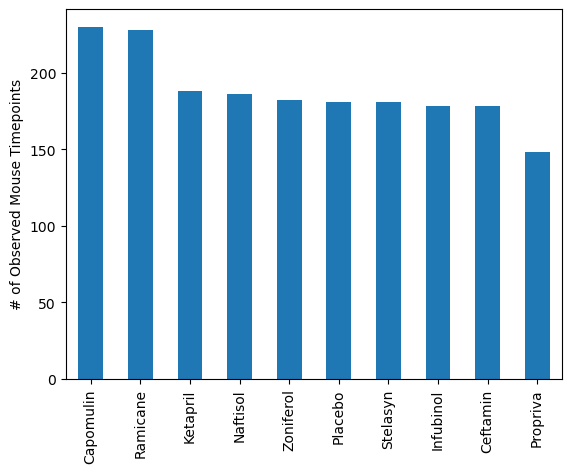

In [18]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
barplot = combined_df_non_duplicated['Drug Regimen'].value_counts().plot.bar()
barplot.set_ylabel("# of Observed Mouse Timepoints")
plt.show()

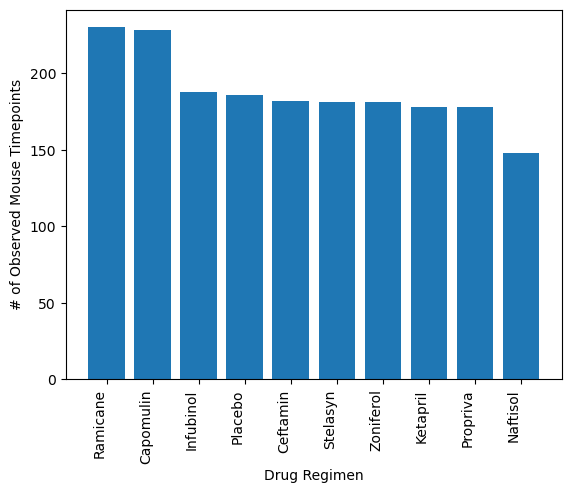

In [19]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
bar_x = combined_df_non_duplicated["Drug Regimen"].unique()
bar_y = combined_df_non_duplicated['Drug Regimen'].value_counts()
plt.bar(bar_x,bar_y,align="center")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90, ha="right")
plt.show()

<Axes: ylabel='Sex'>

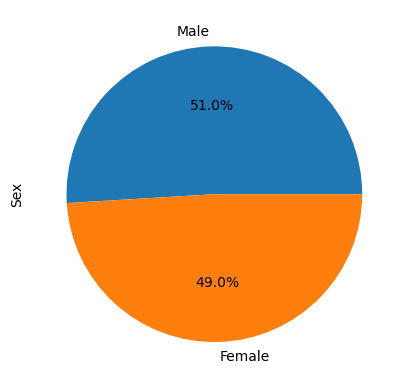

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
combined_df_non_duplicated["Sex"].value_counts().plot.pie(autopct="%1.1f%%")


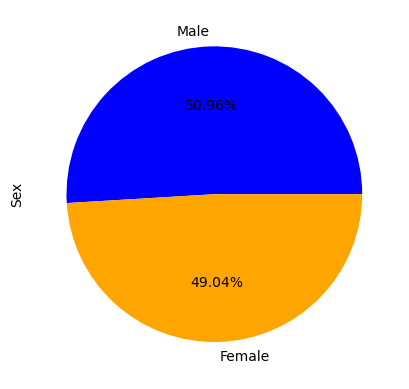

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_counts = combined_df_non_duplicated["Sex"].value_counts()
pie_labels = combined_df_non_duplicated["Sex"].value_counts().index
pie_colors = ["blue","orange"]
plt.pie(sex_counts,labels=pie_labels,colors=pie_colors,autopct="%1.2f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
final_tv = combined_df_non_duplicated.groupby(["Mouse ID"])["Timepoint"].max().reset_index()
combined_df_nd_finaltv = final_tv.merge(combined_df_non_duplicated,how="left",on=["Mouse ID","Timepoint"])
combined_df_nd_finaltv

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [21]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
tumor_final_tv= []

for drug in treatments:
    last_tv = combined_df_nd_finaltv.loc[combined_df_nd_finaltv["Drug Regimen"]==drug,"Tumor Volume (mm3)"]
    tumor_final_tv.append(last_tv)
    quartiles = last_tv.quantile([0.25,.5,.75])
    lower_quart = quartiles[0.25]
    upper_quart = quartiles[0.75]
    inter_q = upper_quart-lower_quart
    lower_bound = lower_quart - (1.5*inter_q)
    upper_bound = upper_quart + (1.5*inter_q)
    outliers_tv = last_tv.loc[(last_tv<lower_bound)|(last_tv>upper_bound)]
    print(f"{drug}'s potential outliers: {outliers_tv}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


Text(0, 0.5, 'Final Tumor Volume (mm3)')

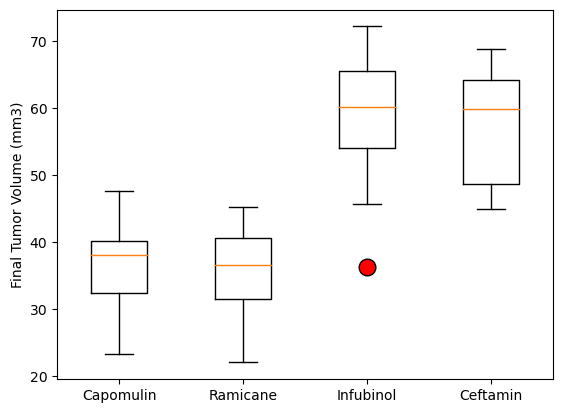

In [22]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
flierprops_box = dict(marker="o", markerfacecolor="red", markersize=12, linestyle="none")
plot_box = plt.boxplot(tumor_final_tv,labels=treatments,flierprops=flierprops_box)
plt.ylabel("Final Tumor Volume (mm3)")

## Line and Scatter Plots

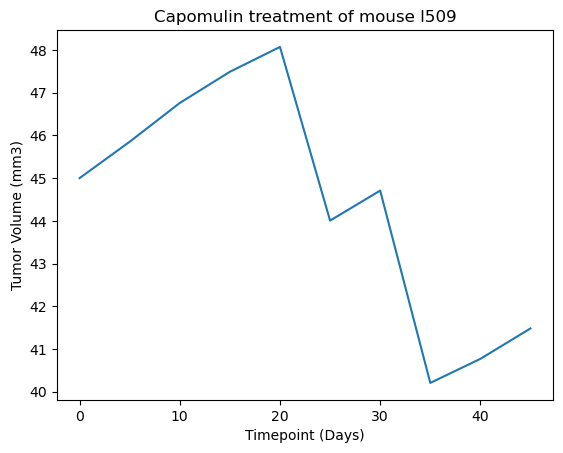

In [23]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Mouse_ID = "l509"
data_l509 = combined_df_non_duplicated[(combined_df_non_duplicated["Mouse ID"]==Mouse_ID)&(combined_df_non_duplicated["Drug Regimen"]=="Capomulin")]
fig_l509 = plt.plot(data_l509["Timepoint"],data_l509["Tumor Volume (mm3)"])
plt.title(f'Capomulin treatment of mouse {Mouse_ID}')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

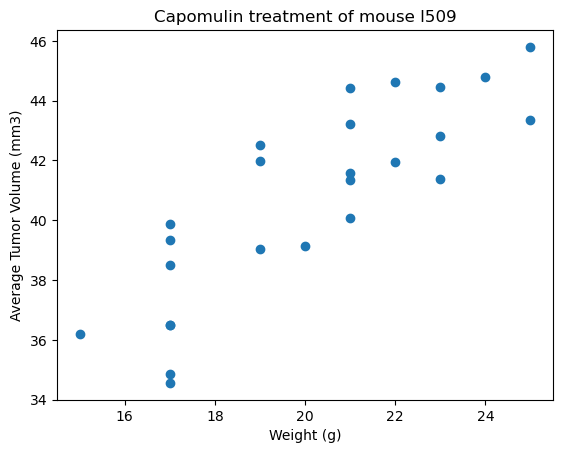

In [24]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
scatter_plot_df = combined_df_non_duplicated[combined_df_non_duplicated["Drug Regimen"]=="Capomulin"]
scatter_plot_avg_tv = scatter_plot_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
scatter_plot_avg_weight = scatter_plot_df.groupby("Mouse ID")["Weight (g)"].mean()
fig_sp = plt.scatter(scatter_plot_avg_weight,scatter_plot_avg_tv)
plt.title(f'Capomulin treatment of mouse {Mouse_ID}')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation coefficient between average mouse weight and average tumor volume is 0.84


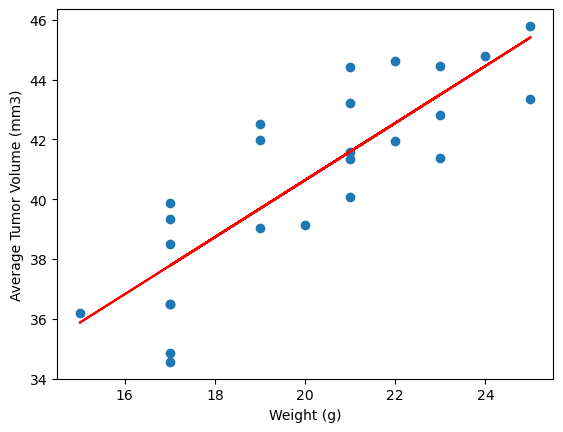

In [25]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

(slope,intercept,rvalue,pvalue,stderr) = st.linregress(scatter_plot_avg_weight,scatter_plot_avg_tv)
print(f"The correlation coefficient between average mouse weight and average tumor volume is {rvalue:.2f}")
plt.plot(scatter_plot_avg_weight, slope * scatter_plot_avg_weight + intercept, color='red')
plt.scatter(scatter_plot_avg_weight,scatter_plot_avg_tv)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()